This notebook shows a simple example of profiling alternative methods of concatenating two pandas DataFrames.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import cProfile

from pstatsviewer import StatsViewer
from qgrid import nbinstall
nbinstall()

In [2]:
# Construct two 5000 x 8 frames with random floats.
df1 = pd.DataFrame(
    np.random.randn(5000, 8),
    columns=[chr(ord('A') + i) for i in range(8)],
    index=range(5000),
)

df2 = pd.DataFrame(
    np.random.randn(5000, 8),
    columns=[chr(ord('A') + i) for i in range(8)],
    index=range(5000, 10000),
)

df1.head(5)

,A,B,C,D,E,F,G,H
0,-0.202888,0.223298,1.574416,1.346593,-0.019807,1.240552,1.499333,0.138494
1,-1.243752,1.883635,-0.748581,0.757643,1.468806,0.768124,0.042421,-1.115317
2,-0.285135,1.233925,1.486682,-1.931239,-0.679030,0.973211,-0.423088,1.287198
3,-0.403491,0.255500,1.145563,0.014282,1.125140,-0.788312,1.281209,0.954208
4,1.114621,0.460504,-0.458997,-0.615001,-1.705668,-0.333626,-0.112132,0.900674


In [3]:
from qgrid import show_grid

## Generating stats files with cProfile:

In [4]:
def concat_naive():
    for i in range(500):
        pd.concat([df1, df2])
        
cProfile.run(
    'concat_naive()',
    'naive.stats',
)

## Table/Grid View

Provides interactive support for:
- Scrolling
- Filtering
- Sorting
- Resizing Columns

In [5]:
slow = StatsViewer("naive.stats")
slow.table()

## Chart View

Supports interactive generation of charts parameterized by no. of functions and sort order.

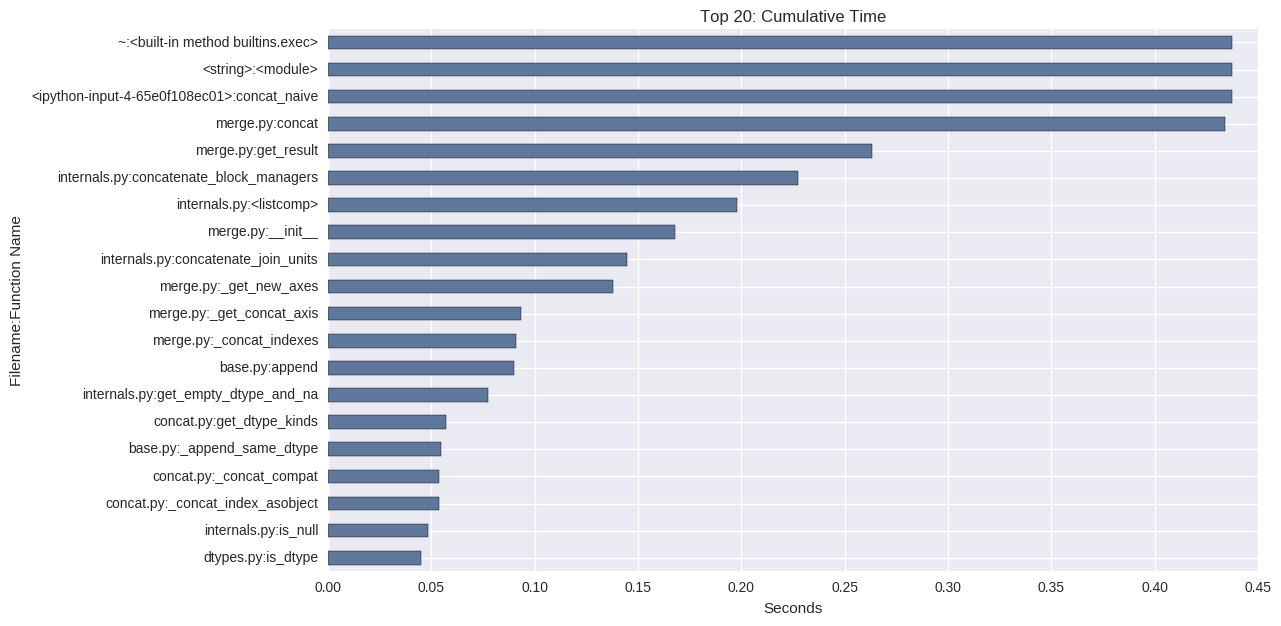

In [6]:
slow.chart()

## Comparing Alternative Implementations

In [7]:
def concat_fast():
    """
    Concatenate using numpy primitives instead of pd.concat.
    """
    for i in range(500):
        pd.DataFrame(
            np.vstack([df1.values, df2.values]),
            columns=df1.columns,
            index=np.hstack([
                df1.index.values,
                df2.index.values,
            ])
        )

cProfile.run(
    'concat_fast()',
    'fast.stats',
)
fast = StatsViewer("fast.stats")

## Comparison View

Both `chart` and `grid` support comparison versions.

In [9]:
slow.compare_table(fast, lsuffix="_slow", rsuffix="_fast")

AttributeError: 'StatsViewer' object has no attribute '_table'

/home/ssanderson/projects/pstats-view/pstatsviewer/viewer.py:95: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  ascending=False


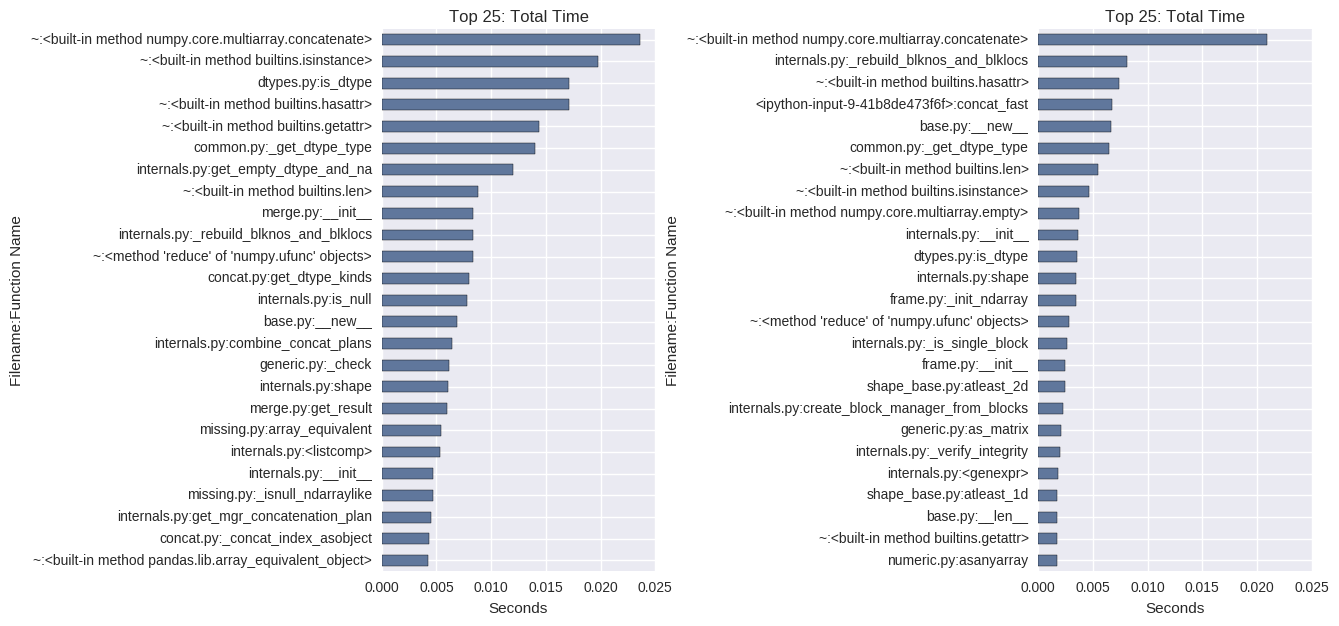

In [11]:
slow.compare_chart(fast, 'tottime', 25)

##How do it do it?

- cProfile output is loaded into a pandas `DataFrame`
- Chart View is implemented with IPython widget delegating to http://github.com/mwaskom/seaborn.
- Table View is implemented with http://github.com/quantopian/qgrid:
  - Built on top of IPython widgets and http://github.com/mleibman/SlickGrid.